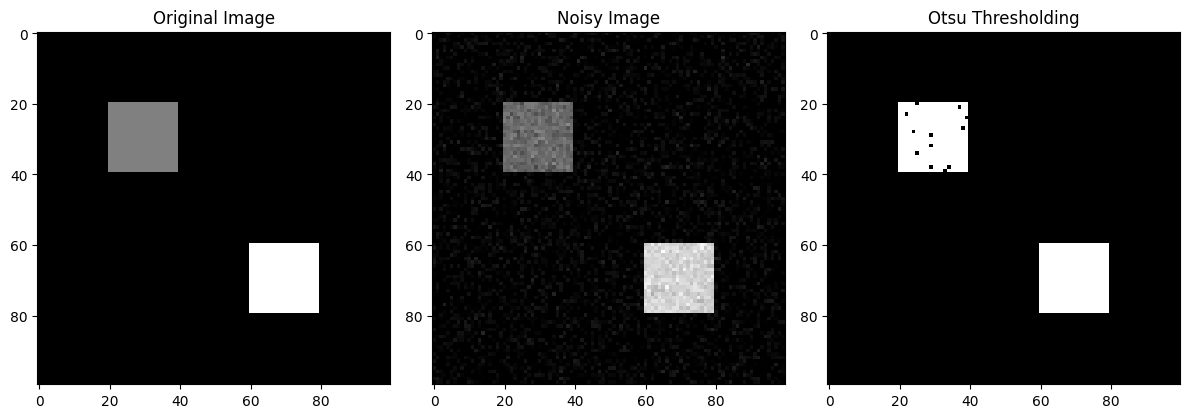

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu

image = np.zeros((100, 100), dtype=np.uint8)
image[20:40, 20:40] = 85
image[60:80, 60:80] = 170


mean = 0
sigma = 10
gaussian_noise = np.random.normal(mean, sigma, image.shape)
noisy_image = image + gaussian_noise
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)


otsu_thresh = threshold_otsu(noisy_image)
binary_otsu = (noisy_image > otsu_thresh).astype(np.uint8) * 255


plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Noisy Image")
plt.imshow(noisy_image, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Otsu Thresholding")
plt.imshow(binary_otsu, cmap='gray')
plt.tight_layout()
plt.show()


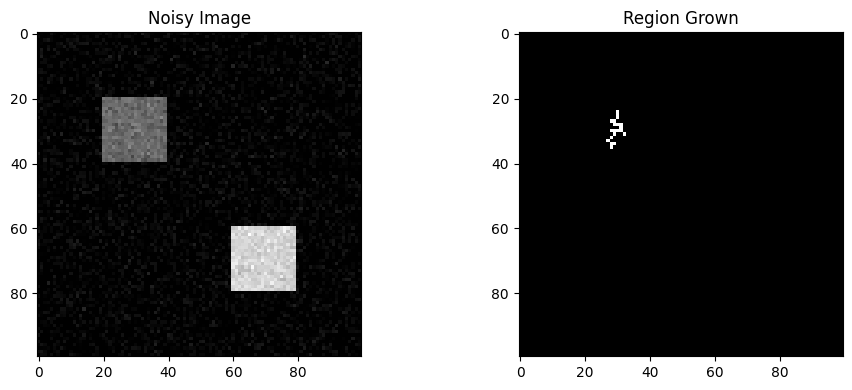

In [2]:
def region_growing(img, seed, thresh=5):
    visited = np.zeros_like(img, dtype=bool)
    region = np.zeros_like(img)
    h, w = img.shape
    seed_value = img[seed]
    stack = [seed]

    while stack:
        x, y = stack.pop()
        if visited[x, y]:
            continue
        visited[x, y] = True
        if abs(int(img[x, y]) - int(seed_value)) < thresh:
            region[x, y] = 255
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    nx, ny = x + dx, y + dy
                    if 0 <= nx < h and 0 <= ny < w and not visited[nx, ny]:
                        stack.append((nx, ny))
    return region


seed_point = (30, 30)
grown_region = region_growing(noisy_image, seed_point, thresh=15)


plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Noisy Image")
plt.imshow(noisy_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Region Grown")
plt.imshow(grown_region, cmap='gray')
plt.tight_layout()
plt.show()
